<a href="https://colab.research.google.com/github/QuinAmii/G2M-Cab-Companies-EDA-Hypothesis/blob/main/G2M_insight_for_Cab_Investment_firm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **G2M insight for Cab Investment firm**

In [41]:
#Importing Libaries
import pandas as pd
import numpy as np
import datetime
import ast, json
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [43]:
#Importing datasets
Data_Cab = pd.read_csv('/content/Cab_Data.csv')
Customer_ID =  pd.read_csv("/content/Customer_ID .csv")
Transaction_ID = pd.read_csv("/content/Transaction_ID.csv")
City = pd.read_csv("/content/City.csv")

In [ ]:
#Displaying first 10 rows of the dataset
Data_Cab.head(10)

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [ ]:
#Displaying the least 10 of the dataset
Data_Cab.tail(10)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359382,10440096,43103,Yellow Cab,WASHINGTON DC,34.24,458.64,472.5120
359383,10440097,43105,Yellow Cab,WASHINGTON DC,9.90,167.09,118.8000
359384,10440098,43105,Yellow Cab,WASHINGTON DC,21.84,358.77,285.6672
359385,10440099,43104,Yellow Cab,WASHINGTON DC,12.87,202.70,159.0732
359386,10440100,43107,Yellow Cab,WASHINGTON DC,28.71,452.19,351.4104
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [ ]:
City.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [ ]:
City.tail(10)

,City,Population,Users
10,DENVER CO,"754,233","12,421"
11,AUSTIN TX,"698,371","14,978"
12,SEATTLE WA,"671,238","25,063"
13,TUCSON AZ,"631,442","5,712"
14,SAN FRANCISCO CA,"629,591","213,609"
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [ ]:
Customer_ID.head(10)

,Customer_ID,Gender,Age,Income
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [ ]:
Customer_ID.tail()

,Customer_ID,Gender,Age,Income
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [ ]:
Transaction_ID.head()

,Transaction ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
#Data Info
print(Data_Cab.info())
print(City.info())
print(Customer_ID.info())
print(Transaction_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 

In [ ]:
#Date set shape
print("/content/Cab_Data.csv", Data_Cab.shape)
print("/content/City.csv", City.shape)
print("/content/Customer_ID.csv", Customer_ID.shape)
print("/content/Transaction_ID.csv", Transaction_ID.shape)

/content/Cab_Data.csv (359392, 7)
/content/City.csv (20, 3)
/content/Customer_ID.csv (49171, 4)
/content/Transaction_ID.csv (440098, 3)


## **DATA TIDYING/CLEANING/VISUALIZATION**



In [44]:
#Data tidying
for col in Data_Cab.columns:
    if ' ' in col:
        Data_Cab = Data_Cab.rename(columns={col:col.replace(' ','_')})

In [45]:
Data_Cab.columns


Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [53]:
for col in City.columns:
    if ' ' in col:
        Data_Cab = City.rename(columns={col:col.replace(' ','_')})

In [54]:
City.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [59]:
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [60]:
Customer_ID.columns


Index(['Customer_ID', 'Gender', 'Age', 'Income_'], dtype='object')

In [61]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [62]:
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [46]:
#Changing the date formart from number of days to day, month and year.
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [47]:
Data_Cab['Date_of_Travel'] = Data_Cab['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [48]:
#Displaying the formarted date
Data_Cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [49]:
#Appending the day, month and year to just year and dropping the column name "date of travel"
months=[]
years =[]
for i in range(len(Data_Cab['Date_of_Travel'])):
    months.append(Data_Cab['Date_of_Travel'][i].month)
    years.append(Data_Cab['Date_of_Travel'][i].year)
Data_Cab['Month'] = months
Data_Cab['Year'] = years

Data_Cab.drop('Date_of_Travel', axis=1, inplace=True)

In [50]:
Data_Cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [ ]:
# Split the dataset into Pink Cab and Yellow Cab before carrying out EDA
Yellow_Cab = Data_Cab[Data_Cab['Company'] == 'Yellow Cab']
Yellow_Cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
233,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016
234,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016
235,10000386,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016
236,10000387,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016
237,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016


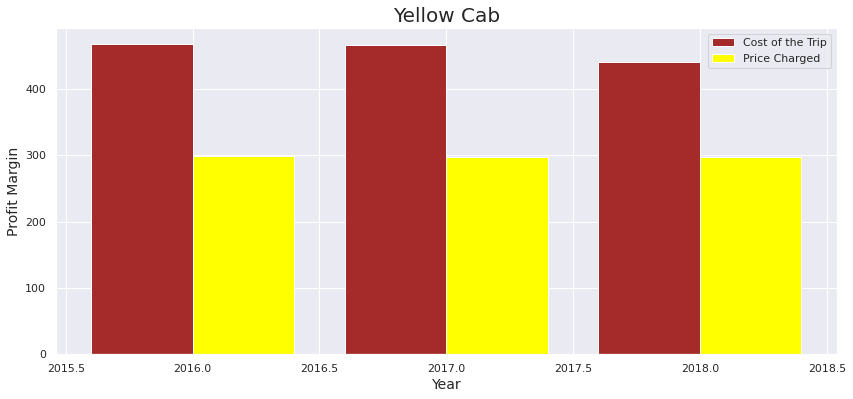

In [ ]:
#Ploting graph to determine the profit margin of the Yellow Cab
plot1 = Data_Cab[Data_Cab.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = Data_Cab[Data_Cab.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plot4 = Data_Cab[Data_Cab.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='brown', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='yellow', align='center',label='Price Charged')
plt.ylabel('Profit Margin',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

In [ ]:
Pink_Cab = Data_Cab[Data_Cab['Company']=='Pink Cab']

In [ ]:
Data_Cab.head(5)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


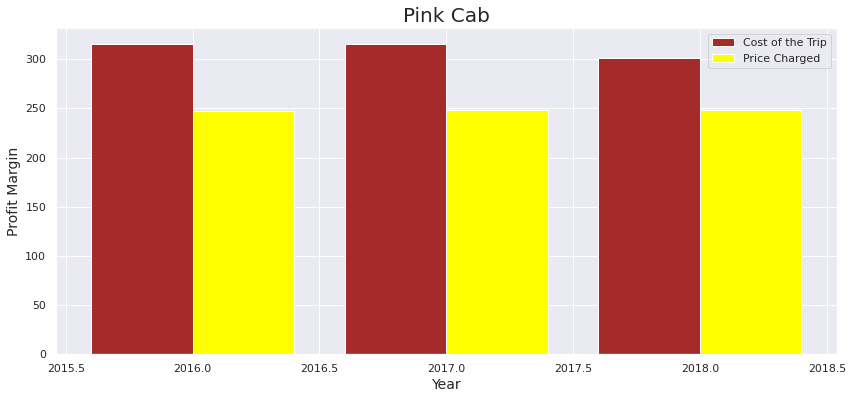

In [ ]:
#Ploting graph to determine the profit margin of the Pink Cab
plot1 = Data_Cab[Data_Cab.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = Data_Cab[Data_Cab.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plot4 = Data_Cab[Data_Cab.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='brown', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='yellow', align='center',label='Price Charged')
plt.ylabel('Profit Margin',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

# **From the above graph we can see that the Yellow Cab had a higher profit margin to Pink Cab**



In [64]:
#Joining Cab dataset with Transaction_ID dataset
left = Data_Cab.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
Data_Master = left.join(right)
Data_Master.head()

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,27182,Card


In [65]:
#Joining Master dataset with Customer_ID dataset
left = Data_Master.set_index([Data_Master.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
Data_Master = left.join(right)
Data_Master.head()

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,Card,Male,33,8536


In [71]:
#Joining Master dataset with City dataset
left = Data_Master.set_index([Data_Master.index,'City'])
right = City.set_index(['City'])
Data_Master = left.join(right)
Data_Master.head(10)

,,Transaction_ID,Customer_ID,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_,Population,Users
,City,,,,,,,,,,,,,,
0,ATLANTA GA,10000011,29290,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701"
1,ATLANTA GA,10000012,27703,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701"
2,ATLANTA GA,10000013,28712,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701"
3,ATLANTA GA,10000014,28020,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701"
4,ATLANTA GA,10000015,27182,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701"
5,ATLANTA GA,10000016,27318,Pink Cab,6.06,72.43,63.024,1,2016,Cash,Male,25,13984,"814,885","24,701"
6,AUSTIN TX,10000017,33788,Pink Cab,44.00,576.15,475.200,1,2016,Card,Male,23,23788,"698,371","14,978"
7,AUSTIN TX,10000018,34106,Pink Cab,35.65,466.10,377.890,1,2016,Card,Male,19,19980,"698,371","14,978"
8,BOSTON MA,10000019,59799,Pink Cab,14.40,191.61,146.880,1,2016,Cash,Male,33,19271,"248,968","80,021"


In [ ]:
#Getting the displayed information for all 4 dateset joined together as one dataset
Data_Master.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290) to (10440107, 52917)
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Company        359392 non-null  object 
 1   City           359392 non-null  object 
 2   KM_Travelled   359392 non-null  float64
 3   Price_Charged  359392 non-null  float64
 4   Cost_of_Trip   359392 non-null  float64
 5   Month          359392 non-null  int64  
 6   Year           359392 non-null  int64  
 7   Payment_Mode   359392 non-null  object 
 8   Gender         359392 non-null  object 
 9   Age            359392 non-null  int64  
 10  Income_        359392 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 47.2+ MB


In [66]:
#Renaming column name Income_(USD/Month) to "Income"
Data_Master = Data_Master.reset_index()
Data_Master = Data_Master.rename(columns={'Income_(USD/Month)':'Income'})


In [67]:
Yellow_Cab = Data_Master[Data_Master['Company'] == 'Yellow Cab']
Yellow_Cab.head()

,Transaction_ID,Customer_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_
233,10000384,27602,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016,Card,Male,23,8542
234,10000385,27594,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016,Cash,Male,28,3901
235,10000386,27884,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016,Cash,Male,32,13505
236,10000387,28533,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016,Cash,Male,39,28386
237,10000388,29039,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016,Card,Male,35,17761


Text(0, 0.5, 'frequency')

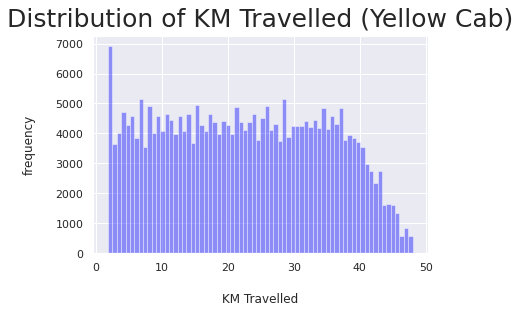

In [ ]:
#Ploting the distribution of the KM travelled Yellow Cab
ax = sns.distplot(Yellow_Cab['KM_Travelled'], kde=False, color='blue',bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=25, y=1.02)
plt.xlabel("KM Travelled", labelpad=20)
plt.ylabel("frequency", labelpad=20)

In [ ]:
plt1 = Data_Master[Data_Master.Company=='Yellow Cab'].groupby(['Year']).Transaction_ID.count()
plt1

Year
2016    82937
2017    97759
2018    93985
Name: Transaction_ID, dtype: int64

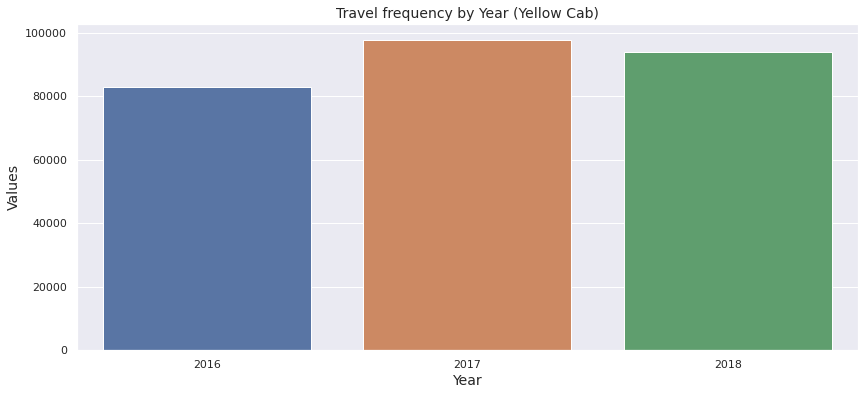

In [ ]:
#Ploting for frequecncy covered in a year (Yellow Cab)
plt.figure(figsize=(14,6))
sns.barplot(x=plt1.index,y=plt1.values)
plt.title('Travel frequency by Year (Yellow Cab)',fontsize = 14)
plt.xlabel('Year', fontsize = 14)
6
plt.ylabel('Values',fontsize = 14)
plt.show()

In [ ]:
Pink_Cab = Data_Master[Data_Master['Company'] == 'Pink Cab']
Pink_Cab.head()

,Transaction_ID,Customer_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_
0,10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,Card,Male,28,10813
1,10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,Card,Male,27,9237
2,10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,Cash,Male,53,11242
3,10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,Cash,Male,23,23327
4,10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,Card,Male,33,8536


Text(0, 0.5, 'frequency')

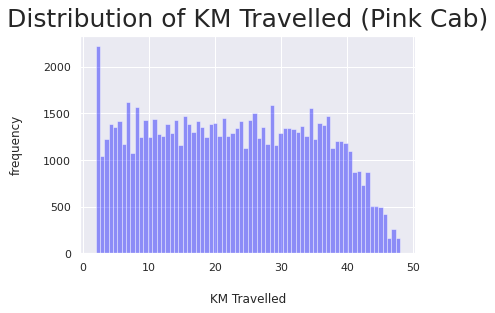

In [ ]:
#Ploting the distribution of the KM travelled Pink Cab
ax = sns.distplot(Pink_Cab['KM_Travelled'], kde=False, color='blue',bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=25, y=1.02)
plt.xlabel("KM Travelled", labelpad=20)
plt.ylabel("frequency", labelpad=20)

In [ ]:
plt2= Data_Master[Data_Master.Company=='Pink Cab'].groupby(['Year']).Transaction_ID.count()
plt2

Year
2016    25285
2017    30205
2018    29221
Name: Transaction_ID, dtype: int64

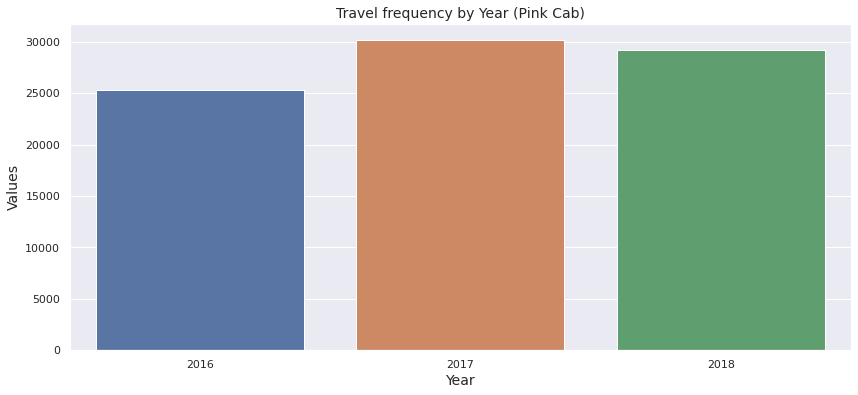

In [ ]:
#Ploting the frequency covered in a year (Pink Cab)
plt.figure(figsize=(14,6))
sns.barplot(x=plt2.index,y=plt2.values)
plt.title('Travel frequency by Year (Pink Cab)',fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

## **Yellow Cab had a higher frequency to Pink Cab**

##**Both Cab companies had higher transaction rate in 2017**

In [93]:
plt1= Data_Master[Data_Master.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plt1

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

<function matplotlib.pyplot.show>

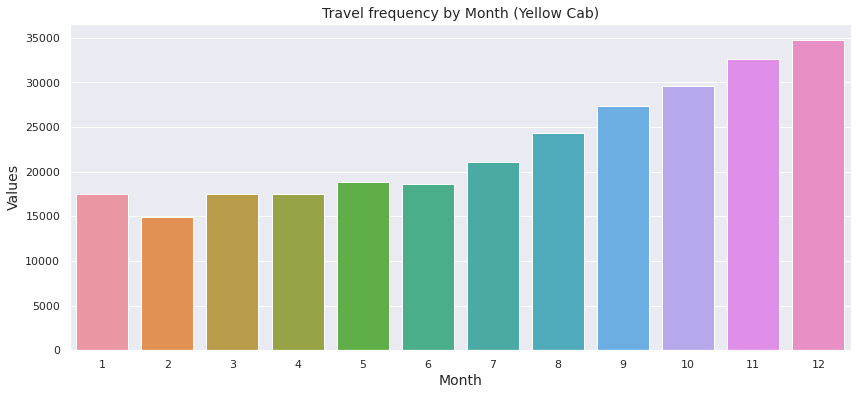

In [94]:
plt.figure(figsize=(14,6))
sns.barplot(x=plt1.index,y=plt1.values)
plt.title('Travel frequency by Month (Yellow Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show

In [95]:
plt2= Data_Master[Data_Master.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plt2

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

<function matplotlib.pyplot.show>

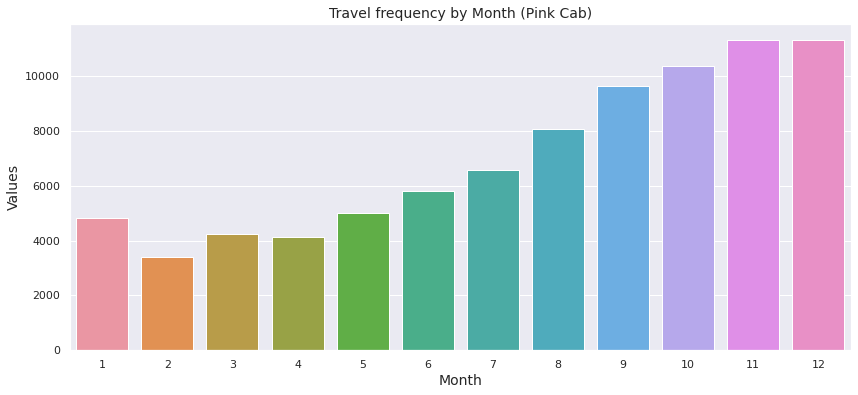

In [96]:
plt.figure(figsize=(14,6))
sns.barplot(x=plt2.index,y=plt2.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show


In [97]:
Data_Master['Profit'] = Data_Master['Price_Charged']-Data_Master['Cost_of_Trip']

In [102]:
Data_Master.head()

,,Transaction_ID,Customer_ID,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_,Population,Users,Profit
,City,,,,,,,,,,,,,,,
0,ATLANTA GA,10000011,29290,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701",57.315
1,ATLANTA GA,10000012,27703,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701",23.666
2,ATLANTA GA,10000013,28712,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701",27.568
3,ATLANTA GA,10000014,28020,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701",25.798
4,ATLANTA GA,10000015,27182,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701",16.844


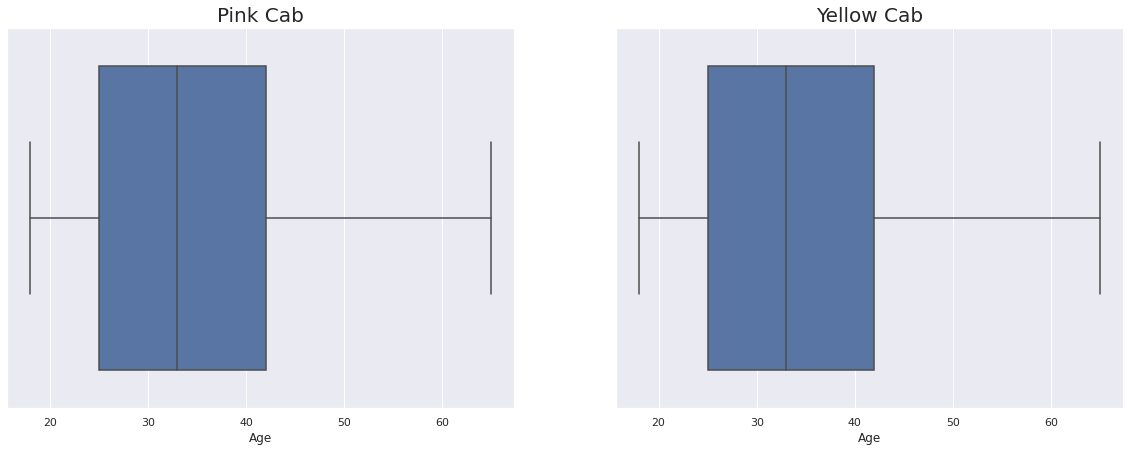

In [99]:
#Ploting the a range of the passengers that used these Compaines
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(Pink_Cab['Age'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(Yellow_Cab['Age'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

# **The age range of the passengers were between 20 t0 65 years**

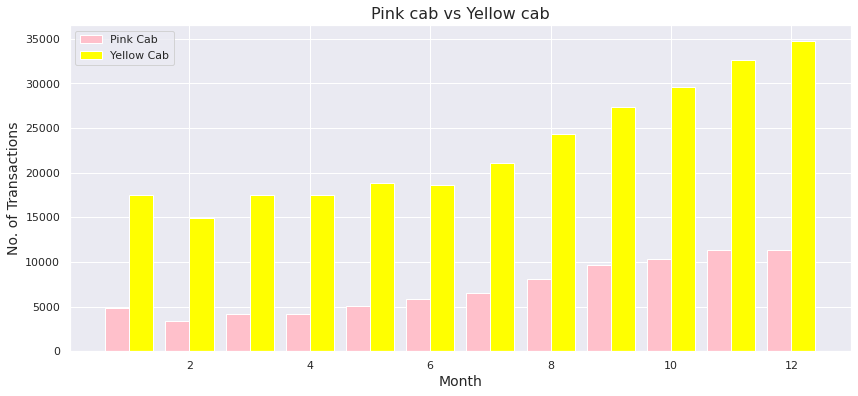

In [ ]:
plt1 = Data_Cab[Data_Cab.Company=='Pink Cab'].groupby('Month').Transaction_ID.count()
plt2 = Data_Cab[Data_Cab.Company=='Yellow Cab'].groupby('Month').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plt1.index-0.2, plt1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plt1.index+0.2, plt2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Month',fontsize = 14)
plt.legend()
plt.show()

In [78]:
city_users =Data_Master.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [73]:
City_yellow = Data_Master[Data_Master.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
City_yellow

City_pink = Data_Master[Data_Master.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
City_pink


City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

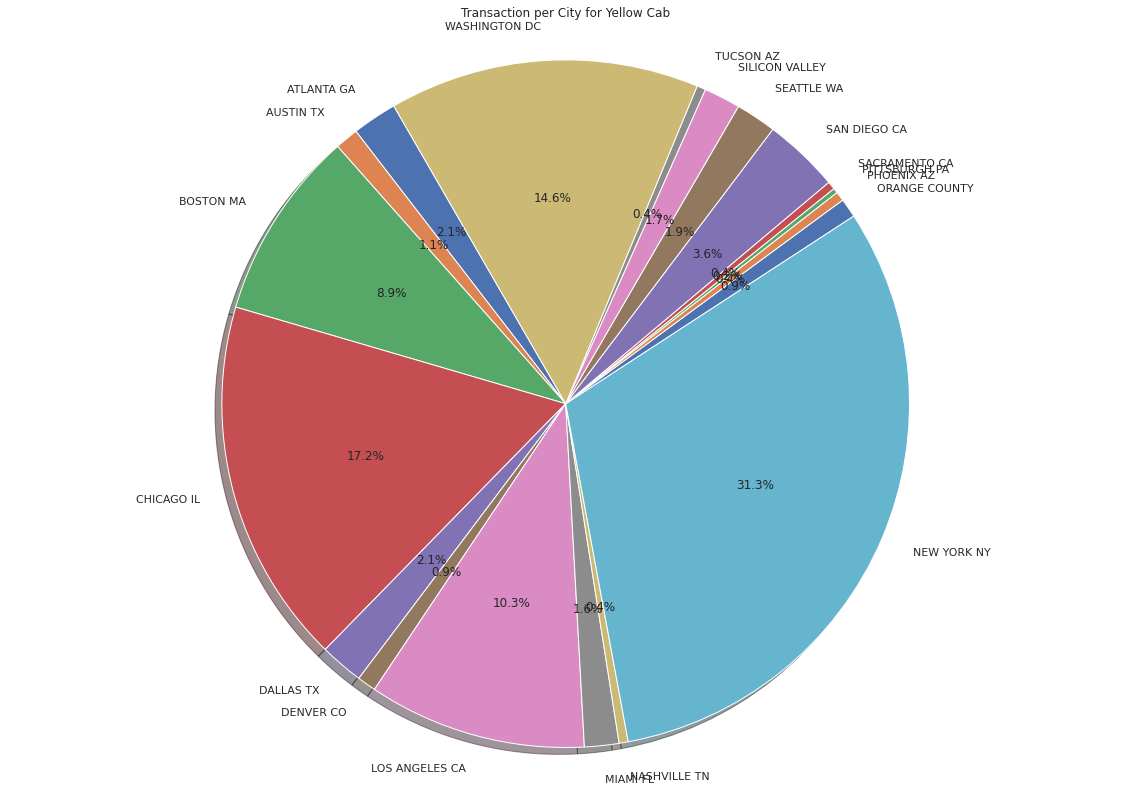

In [84]:
labels = City_yellow.index
Value = City_yellow.values
figp, axp = plt.subplots(figsize=(20,14))
axp.pie(Value , labels=labels, autopct='%1.1f%%',shadow=True, startangle=120,)
axp.axis('equal')


plt.title('Transaction per City for Yellow Cab')
plt.show()

# **New York City had the highest Users Yellow Cab**

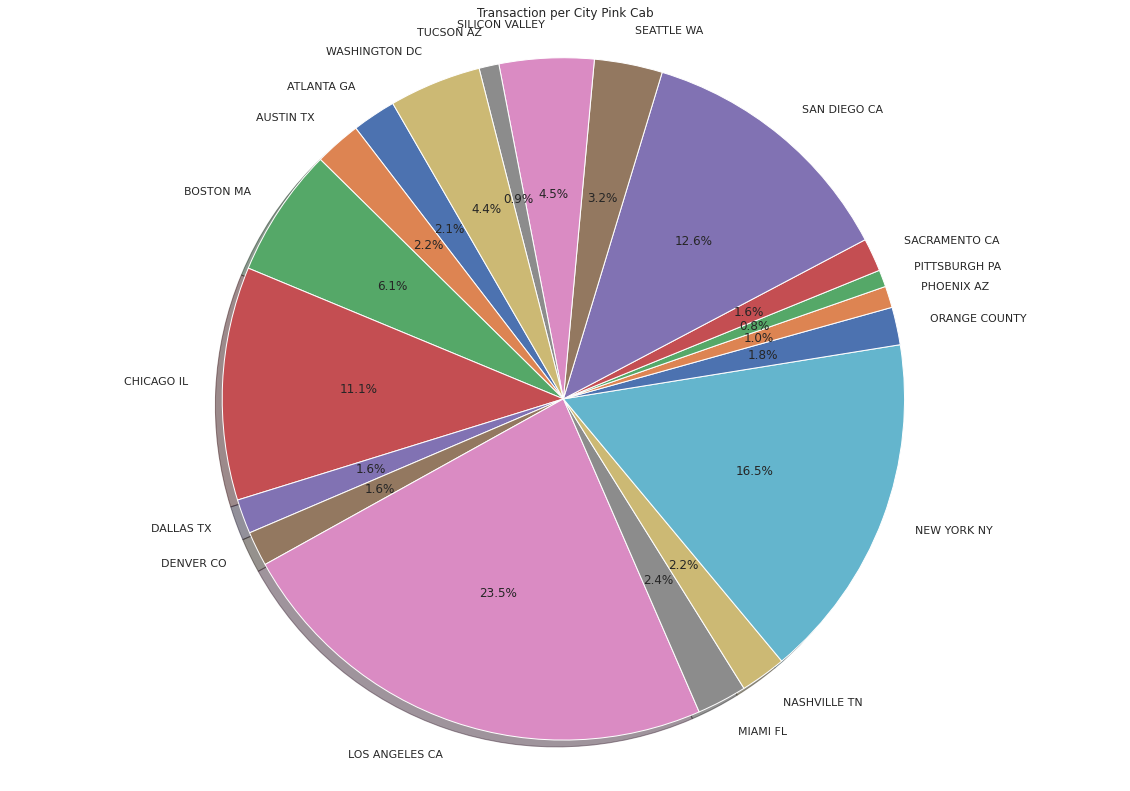

In [89]:
labels = City_pink.index
Value = City_pink.values
figp, axp = plt.subplots(figsize=(20,14))
axp.pie(Value , labels=labels, autopct='%1.1f%%',shadow=True, startangle=120,)
axp.axis('equal')


plt.title('Transaction per City Pink Cab')
plt.show()

# **New Los Angeles had highest Users Pink Cab**

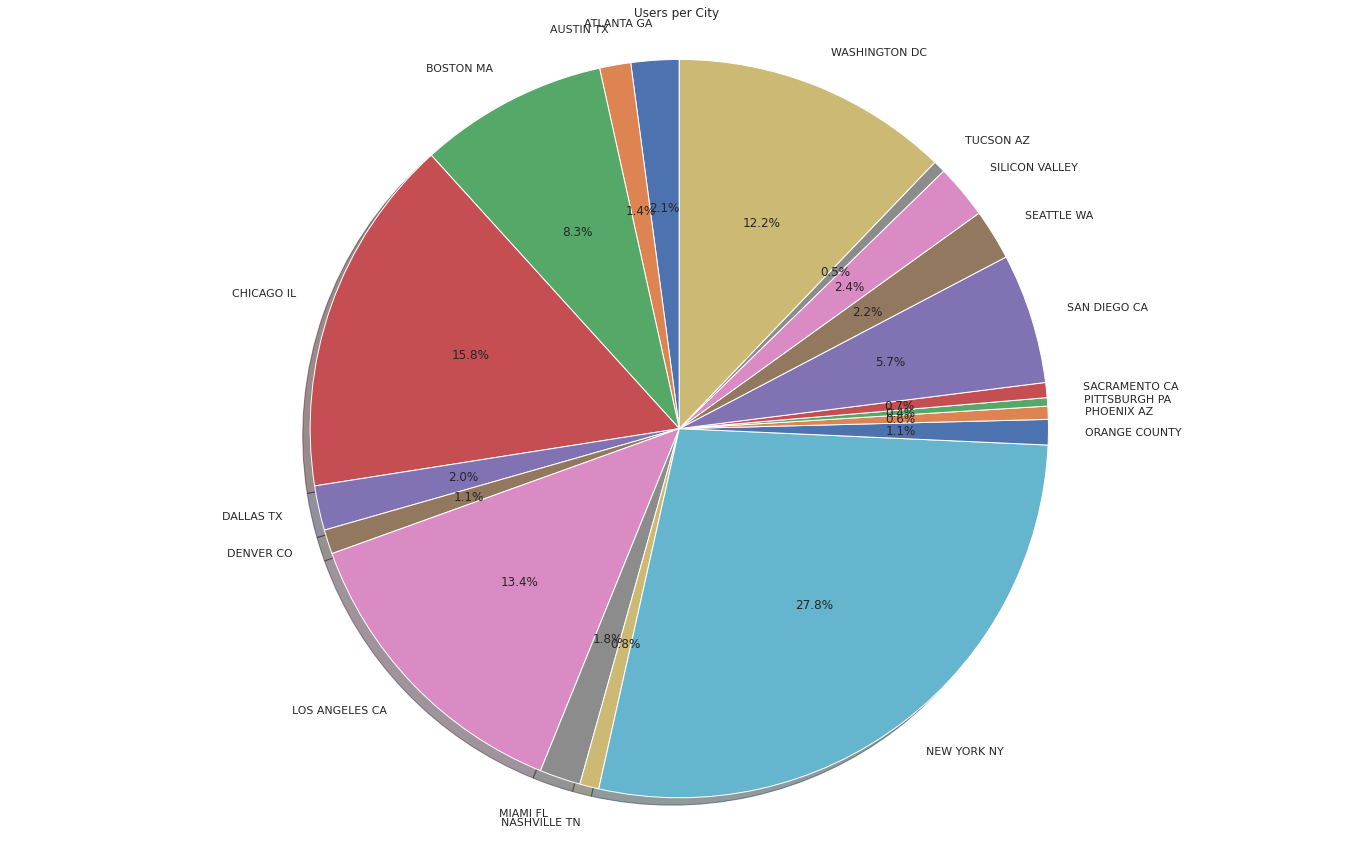

In [87]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(24,15))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

## **New York City hard highest City Users with 27.8%**

In [106]:

G_cab=Data_Master.groupby(['Company','Gender']).Customer_ID.mean()
G_cab

Company     Gender
Pink Cab    Female    19168.565795
            Male      17830.608329
Yellow Cab  Female    20327.327879
            Male      18772.007329
Name: Customer_ID, dtype: float64

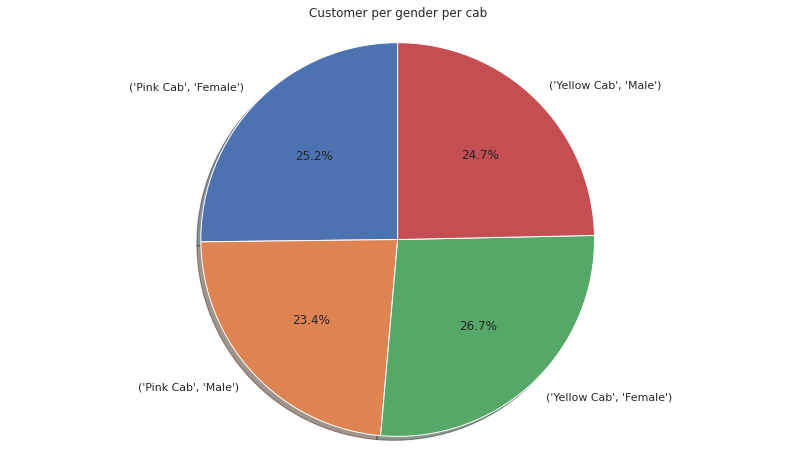

In [111]:
labs = G_cab.index
vals = G_cab.values
figp, axp = plt.subplots(figsize=(14,8))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer per gender per cab')
plt.show()

## **Yellow Cab had slightly more female than male users**

## **Pink Cab had slightly more female than male users**

In [114]:
# Payment Mode Counts in each Company
PMode_cab =Data_Master.groupby(['Company','Payment_Mode'])['Payment_Mode'].agg('count')
PMode_cab

Company     Payment_Mode
Pink Cab    Card             50719
            Cash             33992
Yellow Cab  Card            164785
            Cash            109896
Name: Payment_Mode, dtype: int64

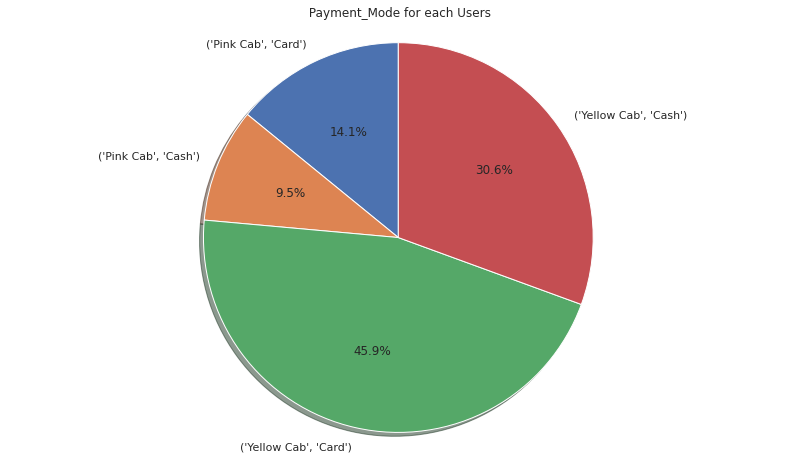

In [116]:
labs = PMode_cab.index
vals = PMode_cab.values
figp, axp = plt.subplots(figsize=(14,8))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title(' Payment_Mode for each Users')
plt.show()

## **Yellow Cab had more card users(45.9%) to cash users(30.6%)**

## **Pink Cab had more card users(14.1%) to cash users(9.5%)**

In [ ]:
def quantile_statistics(Data_Master):
    Q1=Data_Master.quantile(0.75)
    Q3=Data_Master.quantile(0.25)

    # interquartile range 
    IQR=Q3-Q1
    IQR.name='IQR'
    return IQR,Q1,Q3


IQR,_,_=quantile_statistics(Data_Master)
IQR


Transaction_ID   -220127.5000
Customer_ID       -33373.0000
KM_Travelled         -20.9600
Price_Charged       -377.2225
Cost_of_Trip        -262.4832
Month                 -6.0000
Year                  -2.0000
Age                  -17.0000
Income_           -12611.0000
Profit              -162.0180
Name: IQR, dtype: float64

In [ ]:
des_stat=Data_Master.describe()
des_stat=des_stat.append(IQR,ignore_index=False)
des_stat

,Transaction_ID,Customer_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,22.567254,423.443311,286.190113,7.509243,2017.041693,35.336705,15048.822937,137.253198
std,1.268058e+05,21012.412463,12.233526,274.378911,157.993661,3.428929,0.801378,12.594234,7969.409482,160.311840
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000,1.000000,2016.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,2705.000000,12.000000,206.437500,151.200000,5.000000,2016.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,7459.000000,22.440000,386.360000,282.480000,8.000000,2017.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,36078.000000,32.960000,583.660000,413.683200,11.000000,2018.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,12.000000,2018.000000,65.000000,35000.000000,1463.966000
IQR,-2.201275e+05,-33373.000000,-20.960000,-377.222500,-262.483200,-6.000000,-2.000000,-17.000000,-12611.000000,-162.018000


In [121]:
des_stat.head(10)

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_,Profit
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,7.509243,2017.041693,35.336705,15048.822937,137.253198
std,12.233526,274.378911,157.993661,3.428929,0.801378,12.594234,7969.409482,160.311840
min,1.900000,15.600000,19.000000,1.000000,2016.000000,18.000000,2000.000000,-220.060000
25%,12.000000,206.437500,151.200000,5.000000,2016.000000,25.000000,8424.000000,28.012000
50%,22.440000,386.360000,282.480000,8.000000,2017.000000,33.000000,14685.000000,81.962000
75%,32.960000,583.660000,413.683200,11.000000,2018.000000,42.000000,21035.000000,190.030000
max,48.000000,2048.030000,691.200000,12.000000,2018.000000,65.000000,35000.000000,1463.966000
IQR,-20.960000,-377.222500,-262.483200,-6.000000,-2.000000,-17.000000,-12611.000000,-162.018000


In [ ]:
Data_Master.to_csv('G2M Insight for Cab Inv.csv')

In [ ]:
Yellow_Cab = Data_Master[Data_Master['Company'] == 'Yellow Cab']
Yellow_Cab.head()

,Transaction_ID,Customer_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_,Profit
233,10000384,27602,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016,Card,Male,23,8542,877.0076
234,10000385,27594,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016,Cash,Male,28,3901,895.7768
235,10000386,27884,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016,Cash,Male,32,13505,232.3320
236,10000387,28533,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016,Cash,Male,39,28386,504.1600
237,10000388,29039,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016,Card,Male,35,17761,944.1908


#TESTING HYPOTHESIS

In [ ]:
#checking if there is difference in profit by mode of payment
#Yellow Cab
from scipy import stats
a = Data_Master[(Data_Master.Payment_Mode=='Cash')&(Data_Master.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = Data_Master[(Data_Master.Payment_Mode=='Card')&(Data_Master.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value>0.05):
    print('We accept null hypothesis that there is no statistical difference')
else:
    print('We accept alternative hypothesis that there is a statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.29330606382985325


In [ ]:
#checking if there is difference in profit by mode of payment
#Pink Cab

a = Data_Master[(Data_Master.Payment_Mode=='Cash')&(Data_Master.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = Data_Master[(Data_Master.Payment_Mode=='Card')&(Data_Master.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value>0.05):
    print('We accept null hypothesis that there is no statistical difference')
else:
    print('We accept alternative hypothesis that there is a statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.7900465828793288


In [ ]:
#Checking if profit is by age
#Yellow Cab
a = Data_Master[(Data_Master.Age>50)&(Data_Master.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = Data_Master[(Data_Master.Age<=50)&(Data_Master.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that theres a difference')
else:
    print('Accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

43201 231480
Accept alternate hypothesis that theres a difference
P value is  6.4942568177993685e-09


In [ ]:
#Pink Cab
a = Data_Master[(Data_Master.Age>50)&(Data_Master.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = Data_Master[(Data_Master.Age<=50)&(Data_Master.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Accept alternate hypothesis that theres a difference')
else:
    print('Accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

13483 71228
Accept null hypothesis that there is no difference
P value is  0.3281748754798163


In [ ]:
#Checking if profit made is age based
Data_Master[Data_Master.Age<50].groupby('Company').Profit.mean()
Data_Master[Data_Master.Age>=50].groupby('Company').Profit.mean()

Company
Pink Cab       62.156779
Yellow Cab    157.482752
Name: Profit, dtype: float64

In [ ]:
#Checking if profit has effect on gender for Yellow Cab
a = Data_Master[(Data_Master.Gender=='Female')&(Data_Master.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = Data_Master[(Data_Master.Gender=='Male')&(Data_Master.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)


116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


In [ ]:
#Checking if profit had effect on gender for Pink Cab
a = Data_Master[(Data_Master.Gender=='Female')&(Data_Master.Company== 'Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = Data_Master[(Data_Master.Gender=='Male')&(Data_Master.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no statistical difference
P value is  0.11515305900425798


In [ ]:
#Checking if Gender had effect on the price charged Pink Cab
a = Data_Master[(Data_Master.Gender=='Female')&(Data_Master.Company=='Pink Cab')].groupby('Transaction_ID').Price_Charged.mean()
b = Data_Master[(Data_Master.Gender=='Male')&(Data_Master.Company=='Pink Cab')].groupby('Transaction_ID').Price_Charged.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)


37480 47231
We accept null hypothesis that there is no statistical difference
P value is  0.8019871421072007


In [ ]:
#Checking if Gender had effect on the price charged Yellow Cab
a = Data_Master[(Data_Master.Gender=='Female')&(Data_Master.Company=='Yellow Cab')].groupby('Transaction_ID').Price_Charged.mean()
b = Data_Master[(Data_Master.Gender=='Male')&(Data_Master.Company=='Yellow Cab')].groupby('Transaction_ID').Price_Charged.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  2.0207950578635145e-08
